In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/Churn_Modelling.csv')
df

In [ ]:

df['Exited'].value_counts()
#df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)(#------drop unnecassry column)
#df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)(#-----convert string data type in integr= one hot encoding)
df['Geography_Germany'] = df['Geography_Germany'].astype(int)#(convert true false value in 0,1)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)


In [ ]:
x=df.drop(columns=['Exited'])
y=df['Exited']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.preprocessing import StandardScaler#(standrization column, all the value is betwee -1 to 1)
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

x_train_scaled

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))#(3=hidden layer , actiovation =function, 11=input column)
model.add(Dense(1,activation='sigmoid'))#(1=output)

model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])#(log_loss hai)
history=model.fit(x_train_scaled,y_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8389 - loss: 0.3979 - val_accuracy: 0.8281 - val_loss: 0.4070
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8414 - loss: 0.3937 - val_accuracy: 0.8288 - val_loss: 0.4073
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8398 - loss: 0.3942 - val_accuracy: 0.8294 - val_loss: 0.4076
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8454 - loss: 0.3977 - val_accuracy: 0.8294 - val_loss: 0.4078
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8494 - loss: 0.3875 - val_accuracy: 0.8300 - val_loss: 0.4079
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8348 - loss: 0.4076 - val_accuracy: 0.8288 - val_loss: 0.4081
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8399 - loss: 0.4003 - val_accuracy: 0.8288 - val_loss: 0.4082
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8391 - loss: 0.3940 - val_accu

In [ ]:
model.layers[0].get_weights()[0]#(input layer ke weight)

array([[ 0.07499713, -0.3992704 ,  0.00539609],
       [ 0.0906987 ,  4.181395  , -2.8355916 ],
       [-0.01397345,  0.36686146,  0.22796491],
       [ 0.39390317,  0.21448252, -0.13146646],
       [-0.22296092, -0.57517135, -0.24876931],
       [ 0.10426849,  0.67800957,  0.3951192 ],
       [-2.678432  ,  2.6636283 , -0.7907446 ],
       [ 0.09032584,  0.02834528, -0.03039091],
       [ 1.0645607 , -0.17132613, -0.36715877],
       [ 0.12937891,  0.998402  ,  0.4144874 ],
       [-0.6030775 , -0.03452563,  0.3086999 ]], dtype=float32)

In [ ]:
y_log=model.predict(x_test_scaled)# predict model
y_pred=np.where(y_log>0.5,1,0)#standard scale ki value convert in sigmoid
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

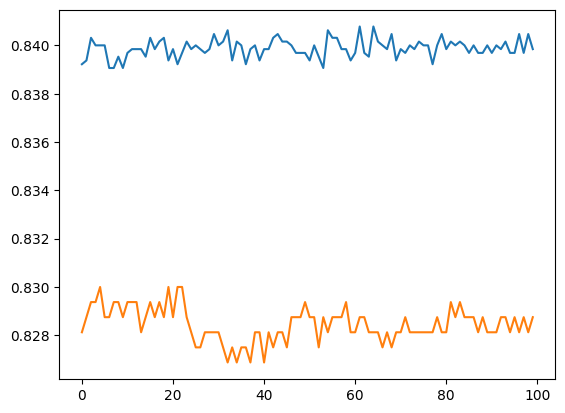

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])